# LIBRARIES

In [1]:
pip install GaugeRnR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=ddf1a87ad1a63c261cadfbfe03c15cc5497585b7c5d0035692682c9941d387e4
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [2]:
import numpy as np
import GaugeRnR
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-2-7790202f3bdd>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [13]:
# Import required libraries
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

<ipython-input-13-8b1c20966cd4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


# CLASSES

In [3]:
class XR_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.R = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.R[i] = data[i].max() - data[i].min()
        
        self.data = data
        
    def ControlChart(self,A2,D3,D4):

        ucl_X   = self.X.mean() + A2*self.R.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A2*self.R.mean()

        ucl_R   = D4*self.R.mean()
        cl_R    = self.R.mean() 
        lcl_R   = D3*self.R.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.R,marker="o",color="k",label="R")
        plt.plot([ucl_R]*len(self.X),color="r",label="UCL={}".format(ucl_R.round(2)))
        plt.plot([cl_R]*len(self.X),color="b",label="CL={}".format(cl_R.round(2)))
        plt.plot([lcl_R]*len(self.X),color="r",label="LCL={}".format(lcl_R.round(2)))
        plt.title("R Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.R)
        plt.title("Boxplot R")
        plt.xlabel("R")
        plt.show()

In [17]:
# this class define how tabular CUSUM chart is plotted
# input: h, k, process mean mu & process standard deviation sigma & delta
# h is unit away from the center line; H=h * sigma
# k is delta/2; K= k * sigma
# delta is the mu1 - mu0, the shift magnitude to be detected
# reference K= (delta/2)*sigma
class CUSUM:
    def fit(self,data, h, k, mu, sigma):
        
        self.X     = data
        self.cplus     = np.zeros(len(data))
        self.cminus     = np.zeros(len(data))
        self.H = h * sigma
        self.K = k * sigma
        self.mean  = mu
        self.sigma = sigma
        self.cplus[0]  = 0
        self.cminus[0] = 0
        for i in range(1,len(self.X)):
            self.cplus[i] = max(0, self.X[i] -(self.mean+self.K) + self.cplus[i-1]) 
            self.cminus[i] = max(0, (self.mean-self.K) - self.X[i] + self.cminus[i-1])

    def  ControlChart(self):
        # all CUSUM parameters will be imported from def fit
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        # I   = np.arange(1,len(self.X)+1)
        
        for i in range(len(self.X)):
            ucl[i] = self.H
            lcl[i] = -1*self.H
              
        plt.figure(figsize=(15,5))
        plt.plot(self.cplus,marker="o",color="k",label="$C+$")
        plt.plot(-1*self.cminus,marker="x",color="k",label="$C-$")
        plt.plot(np.zeros(len(self.X)),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("CUSUM Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()
  

In [4]:
class XS_ControlChart:
    
    def fit(self,data):
        
        self.sample_size = len(data[0])
        self.number_of_sample = len(data)
        self.X = np.zeros((self.number_of_sample,1))
        self.S = np.zeros((self.number_of_sample,1))

        for i in range(self.number_of_sample):
            self.X[i] = data[i].mean()
            self.S[i] = data[i].std()
        
        self.data = data
        
    def ControlChart(self,A3,B3,B4):

        ucl_X   = self.X.mean() + A3*self.S.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - A3*self.S.mean()

        ucl_S   = B4*self.S.mean()
        cl_S    = self.S.mean() 
        lcl_S   = B3*self.S.mean()
        
        plt.figure(figsize=(15,5))
        plt.title("Boxplot for {} Observations\nSample Size {}".format(len(self.data),len(self.data[0])))
        plt.boxplot(self.data.T)
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.S,marker="o",color="k",label="S")
        plt.plot([ucl_S]*len(self.X),color="r",label="UCL={}".format(ucl_S.round(2)))
        plt.plot([cl_S]*len(self.X),color="b",label="CL={}".format(cl_S.round(2)))
        plt.plot([lcl_S]*len(self.X),color="r",label="LCL={}".format(lcl_S.round(2)))
        plt.title("S Chart")
        plt.xticks(np.arange(len(self.data)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.S)
        plt.title("Boxplot S")
        plt.xlabel("S")
        plt.show()

In [5]:
class MR_ControlChart:
    
    def fit(self,data):
        
        self.X = data
        self.number_of_sample = len(self.X)
        self.mR = np.zeros(((self.number_of_sample-1),1))

        for i in range(len(self.mR)):
            self.mR[i] = abs(self.X[i+1] - self.X[i])
    
    def ControlChart(self,d2,D4,D3):
        
        ucl_X   = self.X.mean() + (3/d2*np.sqrt(self.number_of_sample))*self.mR.mean()
        cl_X    = self.X.mean() 
        lcl_X   = self.X.mean() - (3/d2*np.sqrt(self.number_of_sample))*self.mR.mean()

        ucl_mR   = D4*self.mR.mean()
        cl_mR    = self.mR.mean() 
        lcl_mR   = D3*self.mR.mean()
        

        plt.figure(figsize=(15,5))
        plt.plot(self.X,marker="o",color="k",label="X")
        plt.plot([ucl_X]*len(self.X),color="r",label="UCL={}".format(ucl_X.round(2)))
        plt.plot([cl_X]*len(self.X),color="b",label="CL={}".format(cl_X.round(2)))
        plt.plot([lcl_X]*len(self.X),color="r",label="LCL={}".format(lcl_X.round(2)))
        plt.title("X Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()

        plt.figure(figsize=(15,5))
        plt.plot(self.mR ,marker="o",color="k",label="mR ")
        plt.plot([ucl_mR ]*len(self.X),color="r",label="UCL={}".format(ucl_mR.round(2)))
        plt.plot([cl_mR ]*len(self.X),color="b",label="CL={}".format(cl_mR.round(2)))
        plt.plot([lcl_mR ]*len(self.X),color="r",label="LCL={}".format(lcl_mR.round(2)))
        plt.title("mR  Chart")
        plt.xticks(np.arange(len(self.X)))
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(x=self.X)
        plt.title("Boxplot X")
        plt.xlabel("X")
        plt.subplot(1,2,2)
        plt.boxplot(x=self.mR )
        plt.title("Boxplot mR")
        plt.xlabel("mR ")
        plt.show()

In [6]:
class EWMA:
    def fit(self,data,lamda,mean):
        
        self.X     = data
        self.z     = np.zeros(len(data))
        self.lamda = lamda
        self.mean  = mean
        self.z[0]  = self.mean
        for i in range(1,len(self.z)):
            self.z[i] = self.lamda*self.X[i] + (1-self.lamda)*self.z[i-1] 
 
    def  ControlChart(self,L,sigma):
        # L     : Kontrol limitlerinin genişliği
        ucl = np.zeros(len(self.X))
        lcl = np.zeros(len(self.X))
        I   = np.arange(1,len(self.X)+1)
        
        for i in range(len(self.X)):
            ucl[i] = self.mean + L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(I[i])))
            lcl[i] = self.mean - L*sigma*np.sqrt((self.lamda / (2 - self.lamda))*(1-(1-self.lamda)**(I[i])))
        
        plt.figure(figsize=(15,5))
        plt.plot(self.z,marker="o",color="k",label="$Z_i$")
        plt.plot([self.mean]*len(self.X),color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("EWMA Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()
        
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.boxplot(self.X,vert=False)
        plt.title("Boxplot of Data")
        plt.ylabel("Data")
        plt.subplot(1,2,2)
        plt.hist(self.X,bins=int(len(self.X)/3),density=True,color="blue")
        plt.ylabel("Frequency")
        plt.title("Histogram of Data")
        plt.show()

# IMPORTING THE DATA 

In [7]:
# make sure that you use the raw format in Github
# the data is under Dr. Chang's github changsksu folder KState_IMSE541
# use the URL once you find or store the data file (use the raw tab)
# the following input statement is needed to use pandas dataframe feature
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/K-State-IMSE641/master/9E.1%20Molecular%20Weight.csv', sep=',', na_values=".")
data

,Obs,X
0,1,1045
1,2,1055
2,3,1037
3,4,1064
4,5,1095
5,6,1008
6,7,1050
7,8,1087
8,9,1125
9,10,1146


In [22]:
x = np.array([1045,1055,1037,1064,1095,1008,1050,1087,1125,1146,1139,1169,1151,1128,1238,1125,1163,1188,1146,1167])

# 1 Set up an IX and MR control chart using the Molecular weight data set. 

Is the process in control? Discuss. 

1.   Yes, the process is in control becuase there are no data points outside the UCL or LCL. 


Specifically, can you assume all data is stationary and suitable for Phase I control charting? 

2.   Yes, all data is stationary and suitable for Phase I control charting. 



In [24]:
# process mean is computed assuming it is stationary
x.mean()

1116.3

In [20]:
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = []

In [25]:
# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
# since append is used here, if this block of codes is executed twice, m is doubled
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))

m=len(x_bar)
print('points in plotting dataset, ', m)

points in plotting dataset,  20


In [30]:
# sigma estimate is MR-bar/d2 d2=1.128 when n=2
sigma_hat1=38.84/1.128
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat1)


process mean is,  1116.3
process standard deviation is,  34.432624113475185


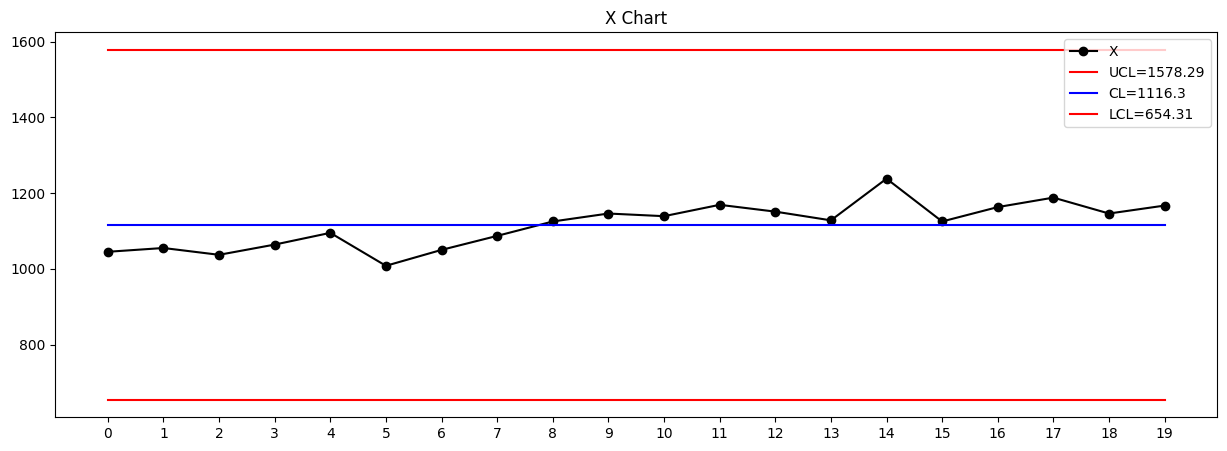

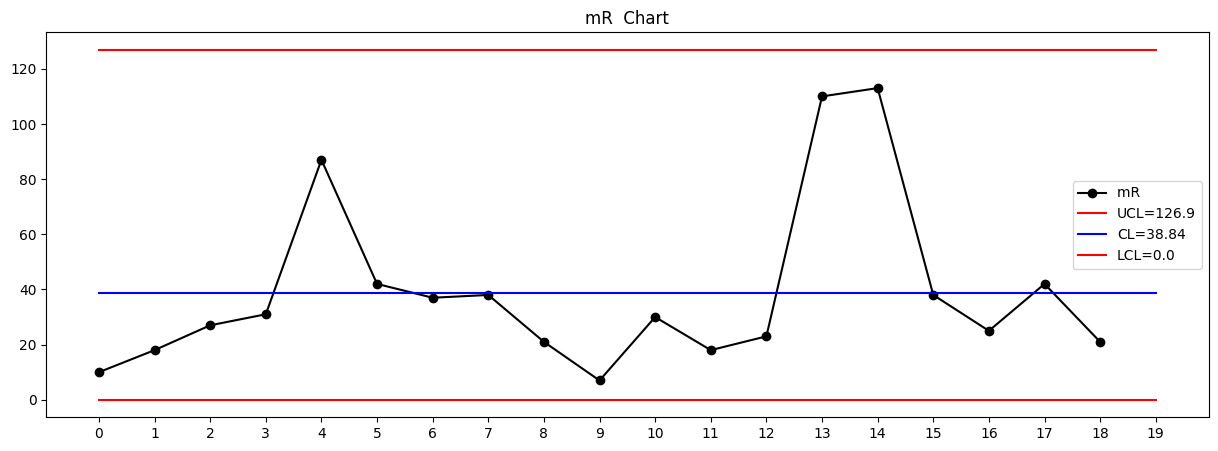

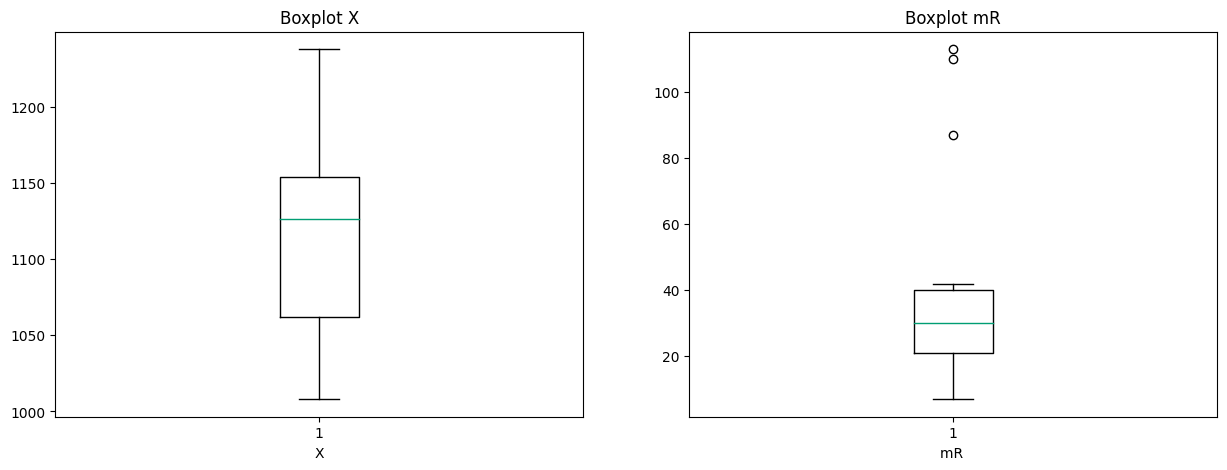

In [31]:
chart = MR_ControlChart()
chart.fit(x)
chart.ControlChart(d2 = 1.128,D3 = 0 ,D4 = 3.267)

# 2. Use the same data set but (a) Set up a tabular CUSUM for catching a one-sigma shift in process mean 

(b) Is the estimate of sigma used in part (a) of this problem reasonable? Discuss.


1.   Yes, the sigma used in part a is good becuase we can detect a one-sigma shift in the process mean after 5 observations. 



In [58]:
# Define list variable for groups means
x_bar2 = []

# Define list variable for groups ranges
s2 = [] 

# Get and append groups means and ranges
# if you run this cell multiple times, then the data series will be repeated
for group in x2:
    x_bar2.append(group.mean())
    s2.append(np.std(group))

m=len(x_bar2)
print('points in x, ', m)

NameError: ignored

In [59]:
# sigma estimate is MR-bar/d2 d2=1.128 when n=2
sigma_hat1=38.84/1.128
print('process mean is, ', x_bar_bar)
print('process standard deviation is, ', sigma_hat1)


process mean is,  1116.3
process standard deviation is,  34.432624113475185


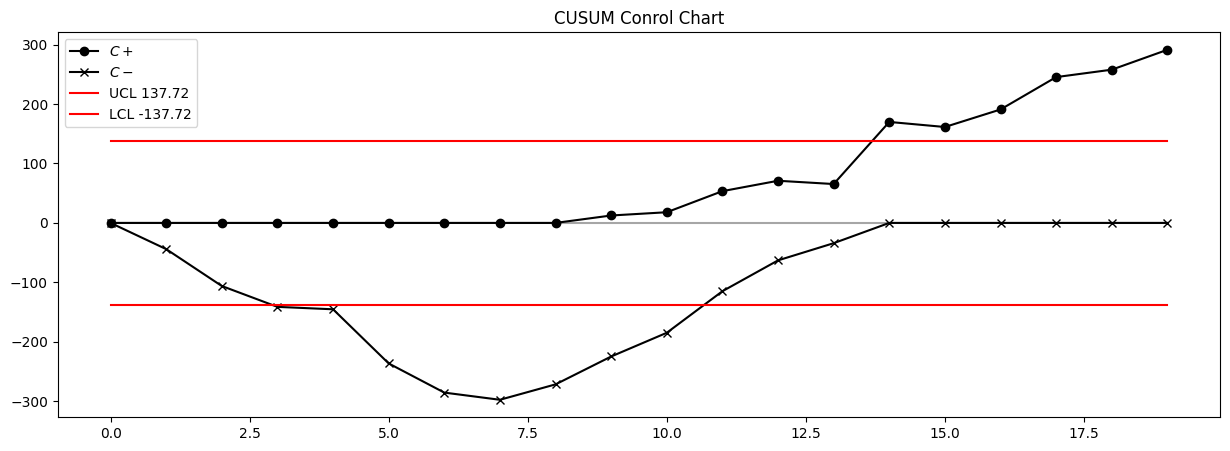

In [60]:
chart = CUSUM()
chart.fit(x, h=4, k=0.5, mu=1116.3, sigma=34.43)
chart.ControlChart()

# 3 Redo 1(a) using a standardized CUSUM

In [42]:
y= x-1116.3/34.432624113475185
y

array([1012.58016478, 1022.58016478, 1004.58016478, 1031.58016478,
       1062.58016478,  975.58016478, 1017.58016478, 1054.58016478,
       1092.58016478, 1113.58016478, 1106.58016478, 1136.58016478,
       1118.58016478, 1095.58016478, 1205.58016478, 1092.58016478,
       1130.58016478, 1155.58016478, 1113.58016478, 1134.58016478])

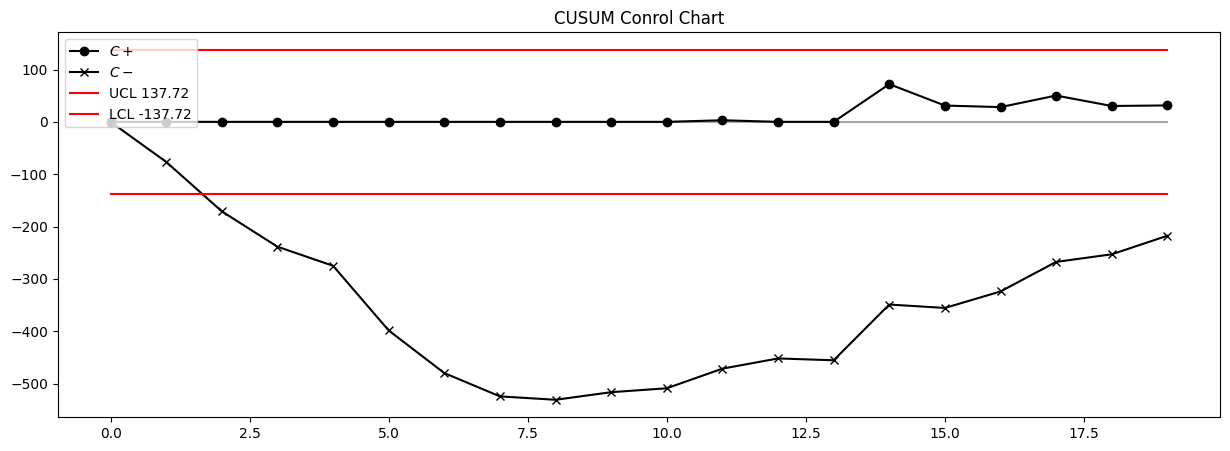

In [44]:
chart = CUSUM()
chart.fit(y, h=4, k=0.5, mu=1116.3, sigma=34.43)
chart.ControlChart()

# 4 (a) Add a headstart feature to the CUSUM (b) Using a combined Shewhart-CUSUM on the data set and interpret the result



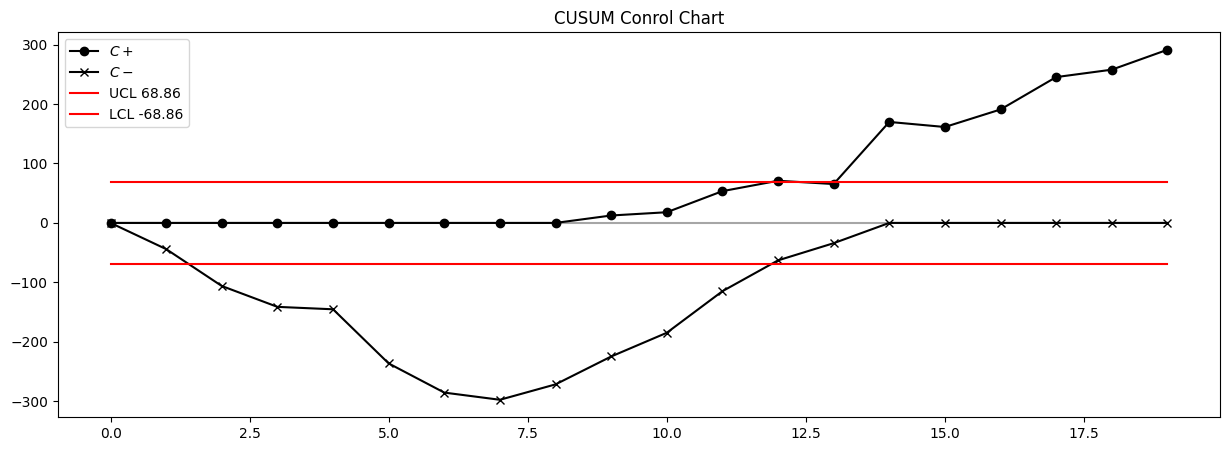

In [40]:
#setting the starting values to H/2 is a 50% headstart so 4/2=2
chart = CUSUM()
chart.fit(data2, h=2, k=0.5, mu=1116.3, sigma=34.43)
chart.ControlChart()

In [48]:
pip install tabulate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from tabulate import tabulate

In [67]:
table = [['Shift Magnitude d', 'IX (L=3.5)', 'CUSUM (h=4, k=1/2)' , 'Combined Chart'], 
         ['----', '----', '----', '----'], 
         [0,2149.344364,290, 255.5235229 ],
         [0.25,2046.631445,276,243.2027173 ],
         [0.5, 758.5948091, 254, 190.2864599],
         [1, 161.127437, 200, 89.23577689 ],
         [2, 14.96845049, 160, 13.68790814 ],
         [3, 3.241096705, 165, 3.178658287],
         [4, 1.446210107, 53, 1.407795612]]

In [68]:
print(tabulate(table))

-----------------  -----------  ------------------  --------------
Shift Magnitude d  IX (L=3.5)   CUSUM (h=4, k=1/2)  Combined Chart
----               ----         ----                ----
0                  2149.344364  290                 255.5235229
0.25               2046.631445  276                 243.2027173
0.5                758.5948091  254                 190.2864599
1                  161.127437   200                 89.23577689
2                  14.96845049  160                 13.68790814
3                  3.241096705  165                 3.178658287
4                  1.446210107  53                  1.407795612
-----------------  -----------  ------------------  --------------


# 5 Repeat 2 (a) and 4(a) using the EWMA chart. (Due when the EWMA chart is covered)

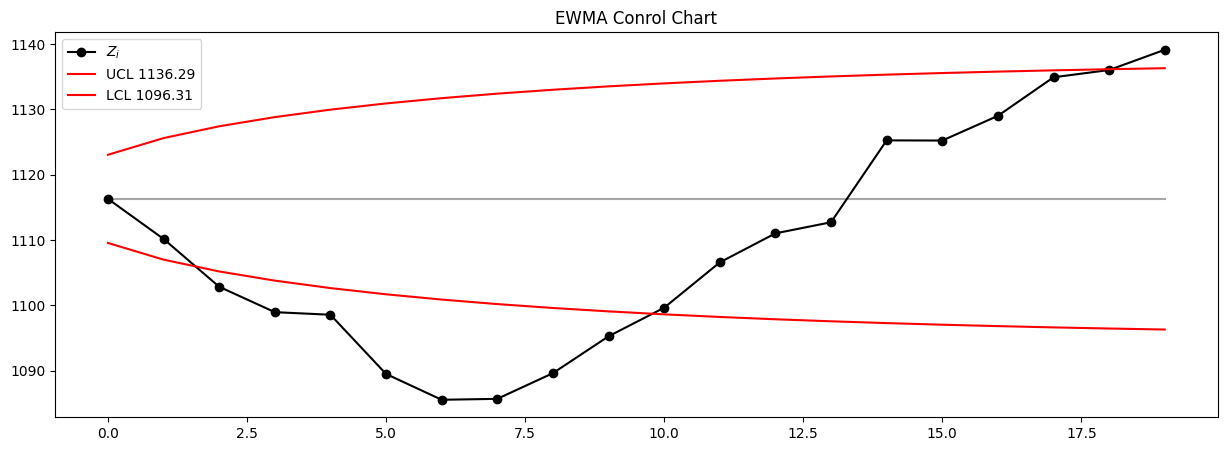

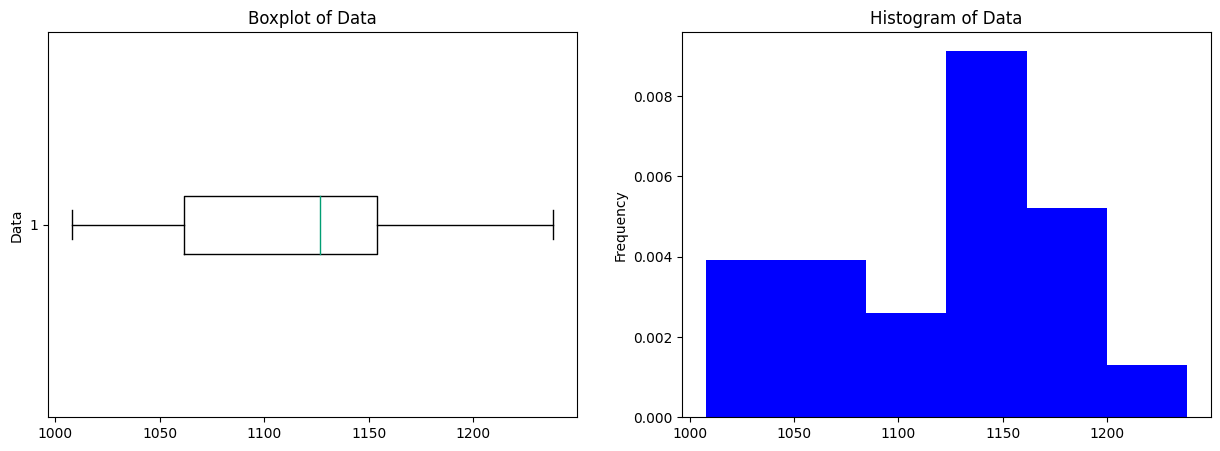

In [39]:
chart = EWMA()
chart.fit(data=x,lamda=0.1,mean=1116.3)
chart.ControlChart(L=2.7,sigma=34.432624113475185)